# Bollinger Bands

Bollinger Bands (BBANDS) technical analysis that computes a moving average of the price  
(you can use the simple moving average of the exponential moving average). In addition  
it computes the standard deviation of the price in the lookback period by treating the  
moving average as the mean price. It then creates an upper band that is a moving, plus  
some multiple of standard price deviaations, and a lower band that is a moving average  
minus multiple standart price deviations. This band represents the expected volatility  
of the price. Now when prices move outside of these bands, that can be interpreted as a  
break/trend signal or an overbought/sold mean reversion signal

Equations to compute the upper Bollinger Bands and the lower Bollinger Bands.  
Both deend, in the first instance, on the middle Bollinger Band (BBAND MIDDLE)  which is  
simple moving average of the previos n time period. The upper and the lower bands are  
then computed by adding/subtrackting ($\beta$ * $\delta$) to BBAND MIDDLE, which is the  
product of standard deviation, 

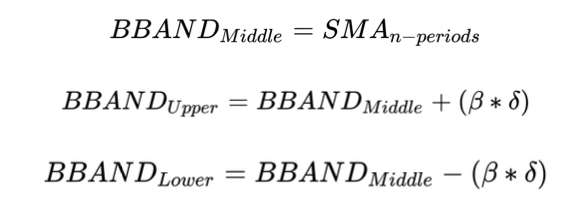

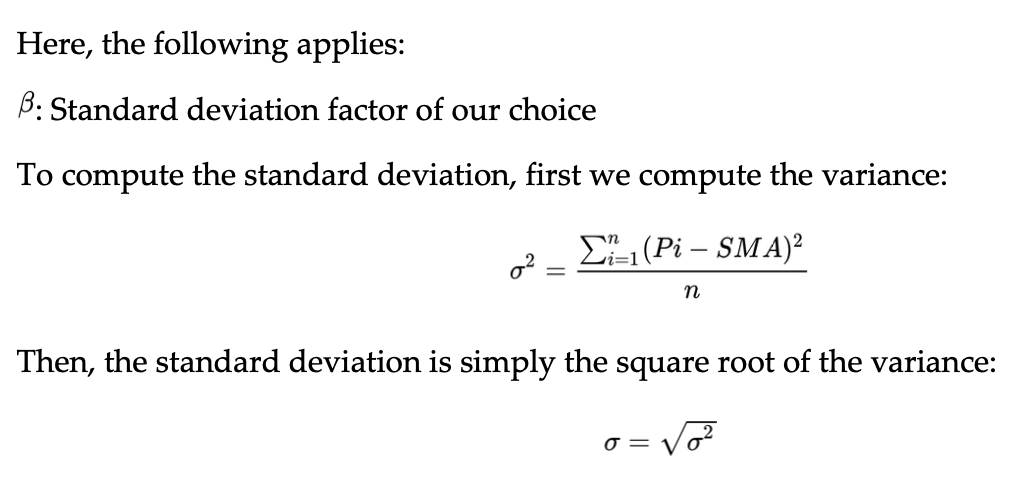

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import statistics as stats
import math as math

In [2]:
df = pd.read_csv('data/SOLUSDT.csv')
close = df['Close']

In [4]:
# History length for Simple Moving Average for middle band
time_period = 20

# Standard Deviation Scaling factor for this upper and lower band
stdev_factor = 2


history = [] # Price history for computing simple moving average
sma_values = [] # Moving average of price for visualization
upper_band = [] # upper band values
lower_band = [] # lower band values

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
    
    sma = stats.mean(history)
    sma_values.append(sma)
    
    # Variance is the square root of standard diviation
    variance = 0
    
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    
    # use square root to get standard diviation
    stdev = math.sqrt(variance / len(history))
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

In [6]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(MiddleBollingerBand20SMA=pd.Series(sma_values, index=df.index))
df_data = df_data.assign(UpperBollingerBand20SMA2StdevFactor=pd.Series(upper_band, index=df.index))
df_data = df_data.assign(LowerBollinherBand20SMA2StdevFactor=pd.Series(lower_band, index=df.index))

close_price = df_data['ClosePrice']
mband = df_data['MiddleBollingerBand20SMA']
uband = df_data['UpperBollingerBand20SMA2StdevFactor']
lband = df_data['LowerBollinherBand20SMA2StdevFactor']

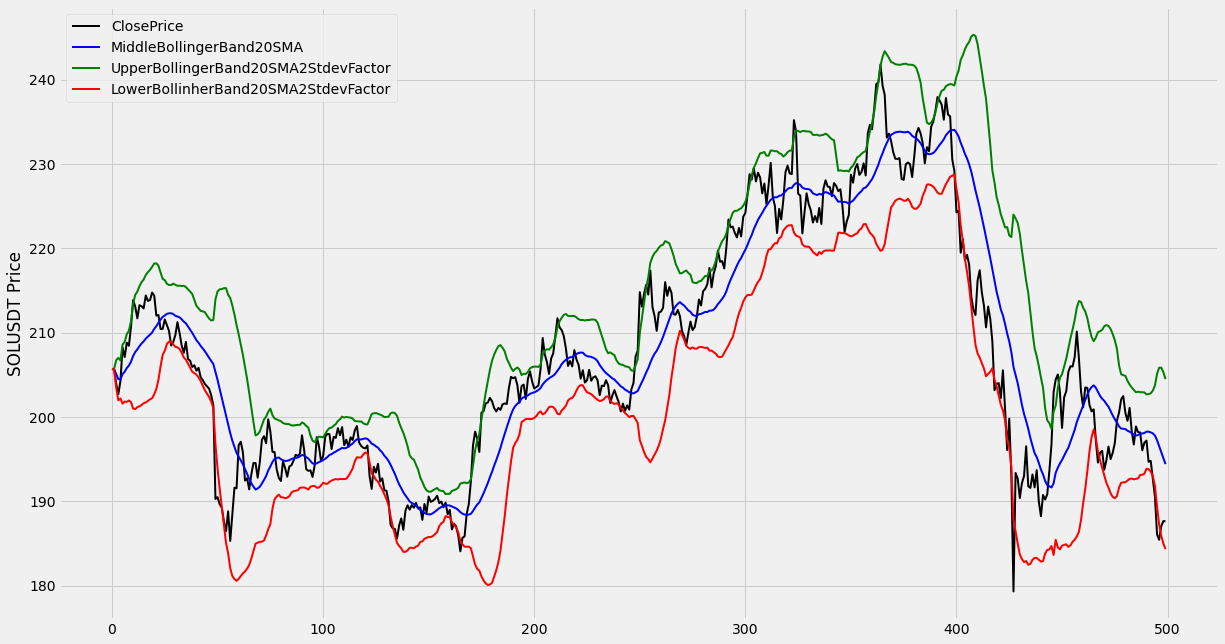

In [10]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(111, ylabel='SOLUSDT Price')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='g', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()